#IT Girls - Health Status Prediction

We collected datasets related to heart disease, one for each team member. Three of these datasets came from Kaggle - an online resource for datasets. The fourth was from the National Health Interview Survey.

# Uploading the datasets into collab

## Columns key

This is a columns key that describes all columns in our dataset, what they mean, and if applicable how they were measured.

WILL PUT COLUMN KEY HERE

## Ruth

This is uploading Ruth's cleaned dataset into the notebook

In [ ]:
import pandas as pd
urlR = 'https://raw.githubusercontent.com/GGC-DSA/health-status-prediction/main/CLEANED%20Datasets/Cleaned%20heart.csv'
dfR = pd.read_csv(urlR)
dfR.head(5)

,age,sex,blood pressure,cholesterol,diagnosis
0,63,1,145,233,1
1,37,1,130,250,1
2,41,0,130,204,1
3,56,1,120,236,1
4,57,0,120,354,1


This is cleaning up a little bit of Ruth's dataset to better match the other datsets. This will help when the data is merged.

In [ ]:
# both column name changes were made to make sure there is a clear difference
# between them and other similar column names in the combined dataset
dfR = dfR.rename(columns = {'cholesterol' : 'serum cholesterol',
                  'blood pressure' : 'rbp'})
dfR.head(5)

,age,sex,rbp,serum cholesterol,diagnosis
0,63,1,145,233,1
1,37,1,130,250,1
2,41,0,130,204,1
3,56,1,120,236,1
4,57,0,120,354,1


## Sarah

This is uploading Sarah's cleaned dataset into the notebook

In [ ]:
# change chd to "diagnosis" upon sarah's approval?

urlS = 'https://raw.githubusercontent.com/GGC-DSA/health-status-prediction/main/CLEANED%20Datasets/heart_disease_no_index.csv'
dfS = pd.read_csv(urlS)
dfS.head(5)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,chd
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


This is cleaning up a little bit of Sarah's dataset to better match the other datsets. This will help when the data is merged.

In [ ]:
# This column name was changed to match the name of a column from another
# dataset with the same purpose
dfS = dfS.rename(columns = {'chd' : 'diagnosis'})
dfS.head(5)

,sbp,tobacco,ldl,adiposity,famhist,typea,obesity,alcohol,age,diagnosis
0,160,12.00,5.73,23.11,Present,49,25.30,97.20,52,1
1,144,0.01,4.41,28.61,Absent,55,28.87,2.06,63,1
2,118,0.08,3.48,32.28,Present,52,29.14,3.81,46,0
3,170,7.50,6.41,38.03,Present,51,31.99,24.26,58,1
4,134,13.60,3.50,27.78,Present,60,25.99,57.34,49,1


## Lily

This is uploading Lily's cleaned dataset into the notebook

In [ ]:
urlL = 'https://raw.githubusercontent.com/GGC-DSA/health-status-prediction/main/CLEANED%20Datasets/heart_failure_clinical_records_dataset_CLEANED.csv'
dfL = pd.read_csv(urlL)
dfL.head(5)

,age,diabetes,high_blood_pressure,sex,smoking,time,DEATH_EVENT,Unnamed: 7
0,75.0,0,1,1,0,4,1,NaN
1,55.0,0,0,1,0,6,1,NaN
2,65.0,0,0,1,1,7,1,NaN
3,50.0,0,0,1,0,7,1,NaN
4,65.0,1,0,0,0,8,1,NaN


This is cleaning up a little bit of Lily's dataset to better match the other datsets. This will help when the data is merged.

In [ ]:
# The following columns were dropped because they were unneeded
dfL = dfL.drop(['time', 'Unnamed: 7'], axis = 1)
# The following columns were renamed to better match the naming of other
# columns in the datasets
dfL = dfL.rename(columns = {'DEATH_EVENT' : 'death event',
                 'high_blood_pressure' : 'hbp'})
# This column's type was changed to match the type of other "age" columns from
# other datasets
dfL = dfL.astype({'age' : int})
dfL.head(5)

,age,diabetes,hbp,sex,smoking,death event
0,75,0,1,1,0,1
1,55,0,0,1,0,1
2,65,0,0,1,1,1
3,50,0,0,1,0,1
4,65,1,0,0,0,1


## May

In [ ]:
urlMRisk = 'https://raw.githubusercontent.com/GGC-DSA/health-status-prediction/main/CLEANED%20Datasets/Risk_Dataset.csv'
dfMRisk = pd.read_csv(urlMRisk)
dfMRisk

,LocationAbbr,LocationDesc,Topic,Indicator,Data_Value_Type,Data_Value,Break_Out_Category,Break_Out,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
0,US,United States,Physical Inactivity,Prevalence of physical inactivity among US adu...,Crude,40.1,Age,35+,T14,NS011,Crude,BOC03,AGE07,59
1,US,United States,Physical Inactivity,Prevalence of physical inactivity among US adu...,Crude,22.7,Age,18-24,T14,NS011,Crude,BOC03,AGE01,59
2,SOU,South,Smoking,Prevalence of current smoking among US adults ...,Crude,18.2,Gender,Male,T15,NS010,Crude,BOC02,GEN01,9003
3,SOU,South,Smoking,Prevalence of current smoking among US adults ...,Crude,22.8,Age,45-64,T15,NS010,Crude,BOC03,AGE05,9003
4,WEST,West,Smoking,Prevalence of current smoking among US adults ...,Crude,16.7,Age,45-64,T15,NS010,Crude,BOC03,AGE05,9004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7915,NRE,Northeast,Hypertension,Prevalence of adults who have had their blood ...,Age-Standardized,NaN,Gender,Female,T9,NS013,AgeStdz,BOC02,GEN02,9001
7916,WEST,West,Hypertension,Prevalence of adults who have had their blood ...,Age-Standardized,NaN,Race,Non-Hispanic White,T9,NS013,AgeStdz,BOC04,RAC01,9004
7917,WEST,West,Hypertension,Prevalence of adults who have had their blood ...,Age-Standardized,NaN,Gender,Male,T9,NS013,AgeStdz,BOC02,GEN01,9004
7918,SOU,South,Hypertension,Prevalence of adults who have had their blood ...,Age-Standardized,NaN,Race,Non-Hispanic White,T9,NS013,AgeStdz,BOC04,RAC01,9003


In [ ]:
urlMCardio = 'https://raw.githubusercontent.com/GGC-DSA/health-status-prediction/main/CLEANED%20Datasets/Cardio_Dataset.csv'
dfMCardio = pd.read_csv(urlMCardio)
dfMCardio.head(5)

,LocationAbbr,LocationDesc,Topic,Indicator,Data_Value_Type,Data_Value,Break_Out_Category,Break_Out,TopicId,IndicatorID,Data_Value_TypeID,BreakOutCategoryId,BreakOutId,LocationID
0,US,United States,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,5.9,Gender,Female,T1,NS001,Crude,BOC02,GEN02,59
1,WEST,West,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Age-Standardized,6.7,Race,Non-Hispanic White,T1,NS001,AgeStdz,BOC04,RAC01,9004
2,NRE,Northeast,Coronary Heart Disease,Prevalence of coronary heart disease among US ...,Crude,4.9,Age,45-64,T4,NS002,Crude,BOC03,AGE05,9001
3,NRE,Northeast,Major Cardiovascular Disease,Prevalence of major cardiovascular disease amo...,Crude,11.5,Age,35+,T1,NS001,Crude,BOC03,AGE07,9001
4,MDW,Midwest,Stroke,Prevalence of stroke among US adults (18+); NHIS,Crude,2.9,Age,45-64,T6,NS004,Crude,BOC03,AGE05,9002


# Combining the datasets

In [ ]:
# This line merges Ruth's and Lily's datasets
dfC = pd.merge(dfR, dfL, how = 'outer', on = ['age', 'sex'])

# This line combines dfC with Sarah's dataset
dfC = pd.merge(dfC, dfS, how = 'outer', on = ['age', 'diagnosis'])

# This line reorganizes the columns to be in an order that
# makes more sense
dfC = dfC[['age', 'sex', 'diagnosis', 'famhist', 'diabetes', 'smoking', 
           'death event', 'rbp', 'hbp', 'sbp', 'serum cholesterol', 'ldl',
           'tobacco', 'adiposity', 'typea', 'obesity', 'alcohol']]

dfC

,age,sex,diagnosis,famhist,diabetes,smoking,death event,rbp,hbp,sbp,serum cholesterol,ldl,tobacco,adiposity,typea,obesity,alcohol
0,63,1.0,1.0,Absent,1.0,0.0,0.0,145.0,1.0,144.0,233.0,4.41,0.01,28.61,55.0,28.87,2.06
1,63,1.0,1.0,Absent,1.0,0.0,0.0,145.0,1.0,146.0,233.0,6.62,0.00,25.69,60.0,28.07,8.23
2,63,1.0,1.0,Absent,1.0,0.0,0.0,145.0,1.0,166.0,233.0,3.82,3.00,26.75,45.0,20.86,0.00
3,63,1.0,1.0,Present,1.0,0.0,0.0,145.0,1.0,136.0,233.0,4.69,8.80,36.07,38.0,26.56,2.78
4,63,1.0,1.0,Absent,0.0,1.0,0.0,145.0,0.0,144.0,233.0,4.41,0.01,28.61,55.0,28.87,2.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6006,17,NaN,1.0,Absent,NaN,NaN,NaN,NaN,NaN,118.0,NaN,2.39,0.00,12.13,49.0,18.46,0.26
6007,19,NaN,0.0,Absent,NaN,NaN,NaN,NaN,NaN,134.0,NaN,3.69,0.00,13.92,43.0,27.66,0.00
6008,19,NaN,0.0,Absent,NaN,NaN,NaN,NaN,NaN,128.0,NaN,2.98,0.00,12.59,65.0,20.74,2.06
6009,36,NaN,1.0,Absent,NaN,NaN,NaN,NaN,NaN,156.0,NaN,3.47,0.00,21.10,73.0,28.40,0.00


In [ ]:
dfC['sex'] = dfC['sex'].fillna(1)
dropped_df = dfC.dropna(axis=0,how='any')

dropped_df

,age,sex,diagnosis,famhist,diabetes,smoking,death event,rbp,hbp,sbp,serum cholesterol,ldl,tobacco,adiposity,typea,obesity,alcohol
0,63,1.0,1.0,Absent,1.0,0.0,0.0,145.0,1.0,144.0,233.0,4.41,0.01,28.61,55.0,28.87,2.06
1,63,1.0,1.0,Absent,1.0,0.0,0.0,145.0,1.0,146.0,233.0,6.62,0.00,25.69,60.0,28.07,8.23
2,63,1.0,1.0,Absent,1.0,0.0,0.0,145.0,1.0,166.0,233.0,3.82,3.00,26.75,45.0,20.86,0.00
3,63,1.0,1.0,Present,1.0,0.0,0.0,145.0,1.0,136.0,233.0,4.69,8.80,36.07,38.0,26.56,2.78
4,63,1.0,1.0,Absent,0.0,1.0,0.0,145.0,0.0,144.0,233.0,4.41,0.01,28.61,55.0,28.87,2.06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5732,50,1.0,0.0,Present,0.0,1.0,0.0,144.0,0.0,150.0,200.0,6.38,0.30,33.99,62.0,24.64,0.00
5733,50,1.0,0.0,Absent,0.0,1.0,0.0,144.0,0.0,142.0,200.0,4.34,18.20,24.38,61.0,26.19,0.00
5734,50,1.0,0.0,Present,0.0,1.0,0.0,144.0,0.0,136.0,200.0,7.85,8.00,23.81,51.0,22.69,2.78
5735,50,1.0,0.0,Absent,0.0,1.0,0.0,144.0,0.0,190.0,200.0,6.03,5.15,36.59,42.0,30.31,72.00


# Hypotheses

As a group, we determined 5 hypotheses we wanted to test based on the exploration of our individual datasets. Because of challenges with the combination of the datasets, we have 4 hypotheses on the merged dataset (Sarah, Ruth, Lily), and one on the individual (May).

### Merged
*   The higher the cholesterol, the more likely a person is to have heart disease
*   Older patients have a higher likelihood of being heart disease positive
*   There is a direct correlation between patients who have diabetes and those who have heart disease.

### Individual
*   Using hypertention, physical inactivity, and smoking as risk factors, people are at the highest risk for cardiovascular disease if they have hypertension.









# Regression Analysis

To determine the validity of the hypotheses we've formulated, we're running a linear regression tests between the factors in each hypothesis. We will test this using an R<sup>2</sup> value - this is a number between 0 and 1 that tells you how strongly correlated the factors are. The closer the R<sup>2</sup> value is to 1, the stronger the correlation. For simplicity sake, we will be looking at the correlations using a Linear Regression model.

#### Cholesterol vs Heart Disease

We hypothesized that higher cholesterol put the patient at higher risk for heart disease.

In [ ]:
import numpy as np
import scipy.stats

#remove rows with no value in cholesterol column
chol_df = dfC.ldl.notnull()
chol_df = dfC[chol_df.notnull()]
chol_df = chol_df.dropna()

#create numpy array to correlate variables
chol_hd = np.array([[chol_df['ldl']],[chol_df['diagnosis']]])

#run linear regression between cholesterol and diagnosis using scipy package
slope, intercept, r, p, std_err = scipy.stats.linregress(chol_hd)

print('Slope = ',slope, 'Intercept = ',intercept, 'R2 = ', r)

Slope =  0.038758423354101734 Intercept =  0.23392651286954466 R2 =  0.15256013515858108


/usr/local/lib/python3.7/dist-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.7/dist-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in sqrt
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


The linear regression analysis between cholesterol and heart disease shows an R<sup>2</sup> value of 0.1526. This is not a very strong correlation. 

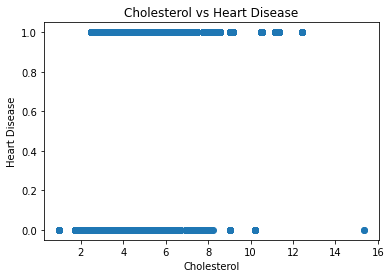

In [ ]:
import matplotlib.pyplot as plt

#scatterplot for cholesterol
plt.scatter(chol_df['ldl'], chol_df['diagnosis'])
plt.title("Cholesterol vs Heart Disease")
plt.xlabel("Cholesterol")
plt.ylabel("Heart Disease")
plt.show()

#### Age vs Heart Disease

The next hypothesis we wanted to test was whether age impacted heart disease positivity.

In [ ]:
age_df = dfC.copy()
age_replace = list(age_df['diagnosis'].replace(np.nan, 1))
age_df['diagnosis'] = age_replace

#create numpy array to correlate variables
age_hd = np.array([[age_df['age']],[age_df['diagnosis']]])

#run linear regression between cholesterol and diagnosis using scipy package
slope, intercept, r, p, std_err = scipy.stats.linregress(age_hd)

print('Slope = ',slope, 'Intercept = ',intercept, 'R2 = ', r)

Slope =  -0.005282062089148963 Intercept =  0.7325948964140147 R2 =  -0.08749048074903182


/usr/local/lib/python3.7/dist-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.7/dist-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in sqrt
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


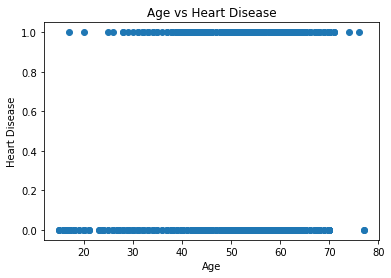

In [ ]:
#scatterplot for cholesterol
plt.scatter(dfC['age'], dfC['diagnosis'])
plt.title("Age vs Heart Disease")
plt.xlabel("Age")
plt.ylabel("Heart Disease")
plt.show()

While the binary diagnosis still makes the graph hard to read, we can clearly see that the age for heart disease positive patients is typically higher than patients without.

#### Diabetes vs Heart Disease

Based on our individual data exploration, we theorize that patients who have diabetes have a higher risk of heart disease.

In [ ]:
#remove rows with no value in cholesterol column
diabetes_df = dfC.diabetes.notnull()
diabetes_df = dfC[diabetes_df.notnull()]
diabetes_df = diabetes_df.dropna()

diabetes_hd = np.array([[diabetes_df['diabetes']],[diabetes_df['diagnosis']]])

scipy.stats.linregress(diabetes_hd)

/usr/local/lib/python3.7/dist-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
/usr/local/lib/python3.7/dist-packages/scipy/stats/_stats_mstats_common.py:142: RuntimeWarning: invalid value encountered in sqrt
  sterrest = np.sqrt((1 - r**2) * ssym / ssxm / df)


LinregressResult(slope=0.04961629181754767, intercept=0.4181256436663234, rvalue=0.049846743630866004, pvalue=nan, stderr=nan)

This correlation is also extremely low - the R<sup>2</sup> value is only a 0.0499. 

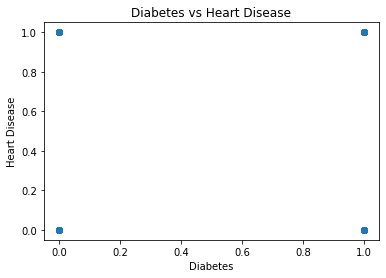

In [ ]:
#scatterplot for cholesterol
plt.scatter(diabetes_df['diabetes'], diabetes_df['diagnosis'])
plt.title("Diabetes vs Heart Disease")
plt.xlabel("Diabetes")
plt.ylabel("Heart Disease")
plt.show()

Because both factors in this correlation are binary, a scatterplot is not the best way to show the correlation between the two factors. In order to get a better look at the information, we'll try a correlation matrix.

<function matplotlib.pyplot.show>

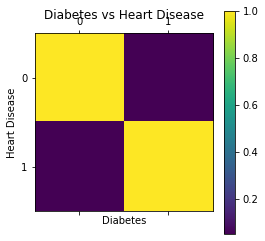

In [ ]:
diabetes_hd_df = diabetes_df[['diabetes','diagnosis']]

corr = diabetes_hd_df.corr()
plt.matshow(corr)
plt.title("Diabetes vs Heart Disease")
plt.xlabel("Diabetes")
plt.ylabel("Heart Disease")
plt.colorbar()
plt.show

The correlation matrix doesn't show any more in-depth explanation, but it makes the information easier to see.

#### Risk Factor vs Cardiovascular Disease

This hypothesis was made using the individual dataset that our team is struggling to merge into the other 3 datasets. The factors we'd like to compare are the likelihood of cardiovascular disease compared to the risk factors: hypertension, physical inactivity, and smoking.

In [ ]:
#Split the risk factors categories into 3 different dataframes in order to compare the R^2 values
dfMRisk['diagnosis'] = 1

#create hypertension df
has_hypertension = dfMRisk['Topic']=='Hypertension'
hypertension_df = dfMRisk[has_hypertension]

#drop blank Data Value columns
hypertension_data_df = hypertension_df.Data_Value.notnull()
hypertension_data_df = hypertension_df[hypertension_df.notnull()]
hypertension_data_df = hypertension_df.dropna()

#create physical inactivity df
is_inactive = dfMRisk['Topic']=='Physical Inactivity'
inactivity_df = dfMRisk[is_inactive]

#drop blank Data Value columns
inactivity_data_df = inactivity_df.Data_Value.notnull()
inactivity_data_df = inactivity_df[hypertension_df.notnull()]
inactivity_data_df = inactivity_df.dropna()

#create smoking df
smokes = dfMRisk['Topic']=='Smoking'
smoking_df = dfMRisk[smokes]

#drop blank Data Value columns
smoking_data_df = smoking_df.Data_Value.notnull()
smoking_data_df = smoking_df[hypertension_df.notnull()]
smoking_data_df = smoking_df.dropna()

#determine linear regression for hypertension
hypertension_hd = np.array([[hypertension_data_df['Data_Value']],[hypertension_data_df['diagnosis']]])

slope, intercept, r, p, std_err = scipy.stats.linregress(hypertension_hd)

print('Hypertension: Slope = ',slope, 'Intercept = ',intercept, 'R2 = ', r)

#determine linear regression for physical inactivity
inactivity_hd = np.array([[inactivity_data_df['Data_Value']],[inactivity_data_df['diagnosis']]])

slope, intercept, r, p, std_err = scipy.stats.linregress(inactivity_hd)

print('Physical Inactivity: Slope = ',slope, 'Intercept = ',intercept, 'R2 = ', r)

#determine linear regression for smoking
smoking_hd = np.array([[smoking_data_df['Data_Value']],[smoking_data_df['diagnosis']]])

slope, intercept, r, p, std_err = scipy.stats.linregress(smoking_hd)

print('Smoking: Slope = ',slope, 'Intercept = ',intercept, 'R2 = ', r)


Hypertension: Slope =  0.0 Intercept =  1.0 R2 =  0.0
Physical Inactivity: Slope =  0.0 Intercept =  1.0 R2 =  0.0
Smoking: Slope =  0.0 Intercept =  1.0 R2 =  0.0


/usr/local/lib/python3.7/dist-packages/scipy/stats/_stats_mstats_common.py:140: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))


Unfortunately, this does not show us much information about whether this factor contributes to heart disease, since all of these cases were positive. 

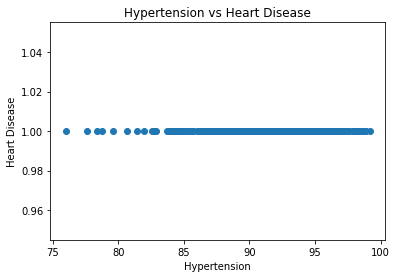

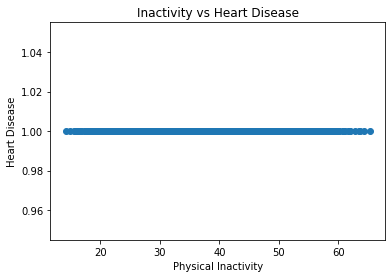

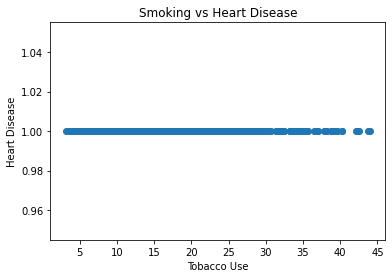

In [ ]:
#hypertension graph
plt.scatter(hypertension_data_df['Data_Value'],hypertension_data_df['diagnosis'])
plt.title("Hypertension vs Heart Disease")
plt.xlabel("Hypertension")
plt.ylabel("Heart Disease")
plt.show()

#hypertension graph
plt.scatter(inactivity_data_df['Data_Value'],inactivity_data_df['diagnosis'])
plt.title("Inactivity vs Heart Disease")
plt.xlabel("Physical Inactivity")
plt.ylabel("Heart Disease")
plt.show()

#smoking graph
plt.scatter(smoking_data_df['Data_Value'],smoking_data_df['diagnosis'])
plt.title("Smoking vs Heart Disease")
plt.xlabel("Tobacco Use")
plt.ylabel("Heart Disease")
plt.show()


#Applying PCA
In order to get a better look at our data, we are applying PCA - principal component analysis - to narrow down which of the factors have the most impact on heart disease.

In order for PCA to work, we have to convert all of the string values in the dataset into numerical values. 

In [ ]:
toNumbers = dropped_df.replace({"Absent":0,'Present':1})

from sklearn.decomposition import PCA
X = toNumbers.to_numpy()
print(X)
pca = PCA(n_components=2)
pca.fit(X)
print(pca.components_)
print(pca.explained_variance_)

[[63.    1.    1.   ... 55.   28.87  2.06]
 [63.    1.    1.   ... 60.   28.07  8.23]
 [63.    1.    1.   ... 45.   20.86  0.  ]
 ...
 [50.    1.    0.   ... 51.   22.69  2.78]
 [50.    1.    0.   ... 42.   30.31 72.  ]
 [50.    1.    0.   ... 31.   26.67 16.3 ]]
[[ 9.30392290e-03 -9.06214680e-04 -1.12627157e-03 -4.57023663e-04
  -1.98525966e-04 -9.92979621e-04  2.28897181e-04  3.74645907e-02
  -2.08602713e-04 -3.22495933e-02  9.98358749e-01 -1.12620314e-03
  -2.86595239e-03  2.75182756e-03 -1.59941604e-02  3.47383574e-04
  -2.17532676e-02]
 [ 2.50426071e-02 -1.61131042e-03  1.82650393e-03  2.50970039e-03
   7.69976537e-04 -3.26256671e-04  3.81997352e-04 -4.89859505e-02
   6.34730238e-04  4.82476981e-01  3.64286918e-02 -2.42006776e-02
   3.02598934e-02  3.58416112e-02  1.82941812e-02  1.59954590e-02
   8.71477017e-01]]
[1864.64277006  546.98024907]


[1.86464277e+03 5.46980249e+02 3.97913191e+02 2.39834386e+02
 1.08009302e+02 4.45547975e+01 3.20933583e+01 2.04913882e+01
 4.25575808e+00 2.97464818e+00 3.40771270e-01 2.61630878e-01
 2.29441151e-01 1.99597453e-01 1.79753758e-01 1.57284978e-01
 9.54159960e-02]


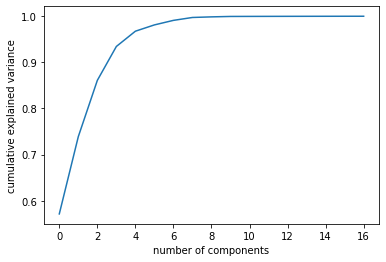

In [ ]:
pca= PCA().fit(X)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
print(pca.explained_variance_)

[[ 1.12220492e-17  1.37996203e-16 -2.06397617e-17 -2.76687140e-02
   2.29517353e-03 -2.29517353e-03 -1.34395348e-33 -0.00000000e+00
   6.12924124e-06  9.15139907e-01 -0.00000000e+00 -2.45833154e-02
  -1.49135977e-01 -2.67216567e-01  1.59629743e-01 -1.88744134e-01
  -7.99142112e-02]
 [ 1.99302874e-16  3.98185333e-17 -2.63671986e-17 -2.69363811e-02
  -8.56671661e-03  8.56671661e-03  5.01069784e-33  0.00000000e+00
  -3.24113339e-05 -2.04673453e-01  0.00000000e+00  7.58514908e-02
  -3.02854462e-01 -2.53073872e-01  8.37182099e-01  2.12912793e-01
   2.22508533e-01]
 [ 3.02887615e-16  9.85340898e-17 -1.37698595e-16 -3.92027145e-02
  -9.55038639e-02  9.55038639e-02  5.16530656e-32 -0.00000000e+00
  -7.52748932e-03 -7.18193661e-02 -0.00000000e+00 -2.97990455e-01
  -3.59957264e-01  1.01493550e-01  6.54304105e-02  2.40327877e-01
  -8.27223897e-01]
 [ 4.54745737e-17  8.98125081e-16  2.19849884e-16  4.54662129e-03
  -5.46878146e-01  5.46878146e-01 -4.53916551e-32 -0.00000000e+00
  -6.24189981e-01  

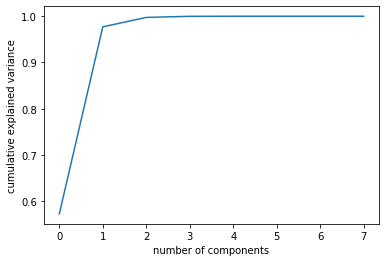

In [ ]:
pca = PCA().fit(X[1:9])
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance');
print(pca.components_)
print(pca.explained_variance_)

Export dataset into csv

In [ ]:
pca_df = dropped_df[['age','sex','diagnosis']]
type(pca_df)

from google.colab import files

pca_df.to_csv('heart_disease_PCA.csv') 
files.download('heart_disease_PCA.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Statistics

After applying PCA to narrow down the number of factors that really influence the dataset, we used the describe method to show a brief overview of all of the factors, and then specifically dig into the factors identified by PCA.

In [ ]:
dropped_df.describe()

,age,sex,diagnosis,diabetes,smoking,death event,rbp,hbp,sbp,serum cholesterol,ldl,tobacco,adiposity,typea,obesity,alcohol
count,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000
mean,55.170486,0.786251,0.441247,0.465995,0.380935,0.257379,131.986434,0.286893,143.995967,245.094775,5.349032,4.697676,29.088143,51.758753,26.752614,17.946821
std,6.027158,0.409989,0.496582,0.498888,0.485661,0.437230,15.427290,0.452353,20.791216,43.124614,1.954634,4.595214,5.988010,10.525525,3.643600,22.593775
min,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.000000,0.000000,108.000000,126.000000,0.980000,0.000000,12.330000,13.000000,18.360000,0.000000
25%,51.000000,1.000000,0.000000,0.000000,0.000000,0.000000,120.000000,0.000000,130.000000,211.000000,4.040000,1.000000,24.380000,46.000000,24.380000,0.000000
50%,58.000000,1.000000,0.000000,0.000000,0.000000,0.000000,130.000000,0.000000,138.000000,240.000000,5.040000,4.000000,29.300000,53.000000,26.880000,10.490000
75%,60.000000,1.000000,1.000000,1.000000,1.000000,1.000000,140.000000,1.000000,158.000000,271.000000,6.580000,6.600000,33.990000,58.000000,28.690000,28.800000
max,64.000000,1.000000,1.000000,1.000000,1.000000,1.000000,192.000000,1.000000,218.000000,407.000000,15.330000,31.200000,42.490000,78.000000,45.720000,147.190000


In [ ]:
dropped_pos = dropped_df.groupby('diagnosis').get_group(1)
dropped_neg = dropped_df.groupby('diagnosis').get_group(0)

print('Number of positive patients:', len(dropped_pos['age']))
print('Number of negative patients:', len(dropped_neg['age']),'\n')
print('The average age of heart disease positive patients is:', round(dropped_pos['age'].mean(),2))
print('The average age of heart disease negative patients is:', round(dropped_neg['age'].mean(),2))

Number of positive patients: 2407
Number of negative patients: 3048 

The average age of heart disease positive patients is: 53.59
The average age of heart disease negative patients is: 56.41


# K-Means Clustering

Now that we know what the important factors are, we can look at them in more depth. To look at the results of
 clustering, we applied K-Means clustering to the age column. Because our diagnosis column only contains 2 categories of values, we chose to set up 2 cluster centers, as shown in the below code (n_clusters=2). 

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

X = dropped_df[['diagnosis', 'age']].to_numpy()
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
kmeans.labels_
centers = kmeans.cluster_centers_
centers

array([[ 0.35093697, 59.04826803],
       [ 0.6057941 , 48.10501811]])

Since the series of numbers output by the cluster_centers_ method are hard to understand, we can graph them so that we can gather some information about the dataset.

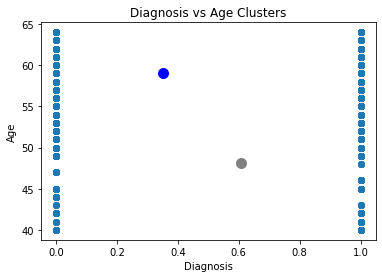

In [ ]:
import matplotlib.pyplot as plt

x = centers[0]
y = centers[1] 

plt.scatter(dropped_df['diagnosis'],dropped_df['age'])
plt.scatter(x[0], x[1], color = "blue", s = 100)
plt.scatter(y[0], y[1], color = "gray", s = 100)

plt.xlabel('Diagnosis')
plt.ylabel('Age')
plt.title('Diagnosis vs Age Clusters')
plt.show()

#Conclusion

The original hypotheses that we created were mostly determined invalid by the PCA algorithm. It determined that the most important factors in our dataset were age and sex. This rules out correlations to cholesterol and diabetes. 

The clustering algorithm shows the same information as the basic statistics that we ran on the attributes identified in PCA. Oddly enough, the heart disease negative patients were older than the heart disease positive patients. In our hypothesis creation, we predicted that the heart disease positive patients would be older than the negative. This algorithm shows that our hypothesis has been disproved.
